# Resolviendo el ejercicio de la clase del 16 de Marzo.

In [20]:
dat <- read.csv("diabetes.csv")

In [21]:
head(dat)

,subject,glyhb,location,age,gender,height,weight,frame
,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,S1002,4.64,Buckingham,58,female,61,256,large
2,S1003,4.63,Buckingham,67,male,67,119,large
3,S1005,7.72,Buckingham,64,male,68,183,medium
4,S1008,4.81,Buckingham,34,male,71,190,large
5,S1011,4.84,Buckingham,30,male,69,191,medium
6,S1015,3.94,Buckingham,37,male,59,170,medium


In [22]:
table(dat$gender, dat$location)

        
         Buckingham Louisa
  female        103    103
  male           75     73

In [23]:
dim(dat)

[1] 354   8

In [24]:
sum(is.na(dat))

[1] 29

In [25]:
min(c(1, 2, 3, 4, NA))

[1] NA

In [26]:
dat = na.omit(dat)  # Elimino los datos ausentes

In [27]:
tapply(dat$age, list(dat$gender, dat$location), min ) # esto se puede hacer aggregate

,Buckingham,Louisa
female,19,19
male,20,20


In [28]:
aggregate(dat$age, list(gender = dat$gender, location=dat$location), min)

gender,location,x
<chr>,<chr>,<int>
female,Buckingham,19
male,Buckingham,20
female,Louisa,19
male,Louisa,20


In [29]:
with(dat, aggregate(age, list(gender = gender, location=location), min))

gender,location,x
<chr>,<chr>,<int>
female,Buckingham,19
male,Buckingham,20
female,Louisa,19
male,Louisa,20


Como usar más de una función en tapply: 

https://stackoverflow.com/questions/15215076/multiple-functions-in-a-single-tapply-or-aggregate-statement

In [30]:
tapply(dat$age, list(dat$gender, dat$location), function(x) { c(min(x), max(x)) } )

Buckingham Louisa
female 19, 92     19, 84
male   20, 78     20, 80

In [31]:
aggregate(dat$age, list(dat$gender, dat$location), function(x) { c(min(x), max(x)) } )

Group.1,Group.2,x
<chr>,<chr>,"<int[,2]>"
female,Buckingham,"19, 92"
male,Buckingham,"20, 78"
female,Louisa,"19, 84"
male,Louisa,"20, 80"


# La operación melt 

Los dataframes son más flexibles que las matrices.

Si tengo una matriz entonces este se puede representar como un dataframe. 

Pero lo contrario no se da es decir: 

Si tengo un dataframe entonces no necesariamente se puede representar como una matriz.

La idea de melt es pasar de una representación de una matriz a un dataframe.

In [34]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [35]:
library("reshape2")

In [37]:
averages <- with(dat, tapply(glyhb, list(frame, gender), mean, na.rm=TRUE))

Vamos a tomar como conveción el uso de with. 

In [38]:
averages

,female,male
large,6.089091,5.929811
medium,5.490106,5.973273
small,5.061587,4.811379


In [40]:
melt(averages)

Var1,Var2,value
<fct>,<fct>,<dbl>
large,female,6.089091
medium,female,5.490106
small,female,5.061587
large,male,5.929811
medium,male,5.973273
small,male,4.811379


In [41]:
counts <- with(dat, table(gender, location))

In [42]:
counts # esta representación es util a fines de visualización

        location
gender   Buckingham Louisa
  female         92     98
  male           67     70

In [44]:
melt(counts) # esta representación es más operativa, se puede hacer análisis de datos

gender,location,value
<fct>,<fct>,<int>
female,Buckingham,92
male,Buckingham,67
female,Louisa,98
male,Louisa,70


# Mezclando dos data frames. 

In [46]:
diabetes <- read.csv("diabetes.csv")

In [47]:
head(diabetes)

,subject,glyhb,location,age,gender,height,weight,frame
,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,S1002,4.64,Buckingham,58,female,61,256,large
2,S1003,4.63,Buckingham,67,male,67,119,large
3,S1005,7.72,Buckingham,64,male,68,183,medium
4,S1008,4.81,Buckingham,34,male,71,190,large
5,S1011,4.84,Buckingham,30,male,69,191,medium
6,S1015,3.94,Buckingham,37,male,59,170,medium


In [48]:
cholesterol <- read.csv("chol.csv")

In [49]:
head(cholesterol)

,subject,chol
,<chr>,<int>
1,S1000,203
2,S1001,165
3,S1002,228
4,S1005,249
5,S1008,248
6,S1011,195


La idea es unir la información de diabetes con la de colesterol.

In [50]:
diabetes2 <- diabetes

In [51]:
diabetes2$chol <- cholesterol$chol

ERROR: ignored

In [52]:
dim(diabetes2)

[1] 354   8

In [53]:
dim(cholesterol)

[1] 362   2

In [56]:
length(intersect(diabetes$subject, cholesterol$subject))

[1] 320

La operación que me combinaria los dos dataframes tendria que tener 320 filas.

In [57]:
diabetes2 <- merge(diabetes, cholesterol, by="subject") # este tipo de operaciòn 
                                                        # se le llama inner join

In [58]:
head(diabetes2)

,subject,glyhb,location,age,gender,height,weight,frame,chol
,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,S10001,4.01,Buckingham,21,female,65,169,large,132
2,S10016,6.39,Buckingham,71,female,63,244,large,228
3,S1002,4.64,Buckingham,58,female,61,256,large,228
4,S10020,7.53,Buckingham,64,male,71,225,large,181
5,S1005,7.72,Buckingham,64,male,68,183,medium,249
6,S1008,4.81,Buckingham,34,male,71,190,large,248


In [59]:
dim(diabetes2)

[1] 320   9

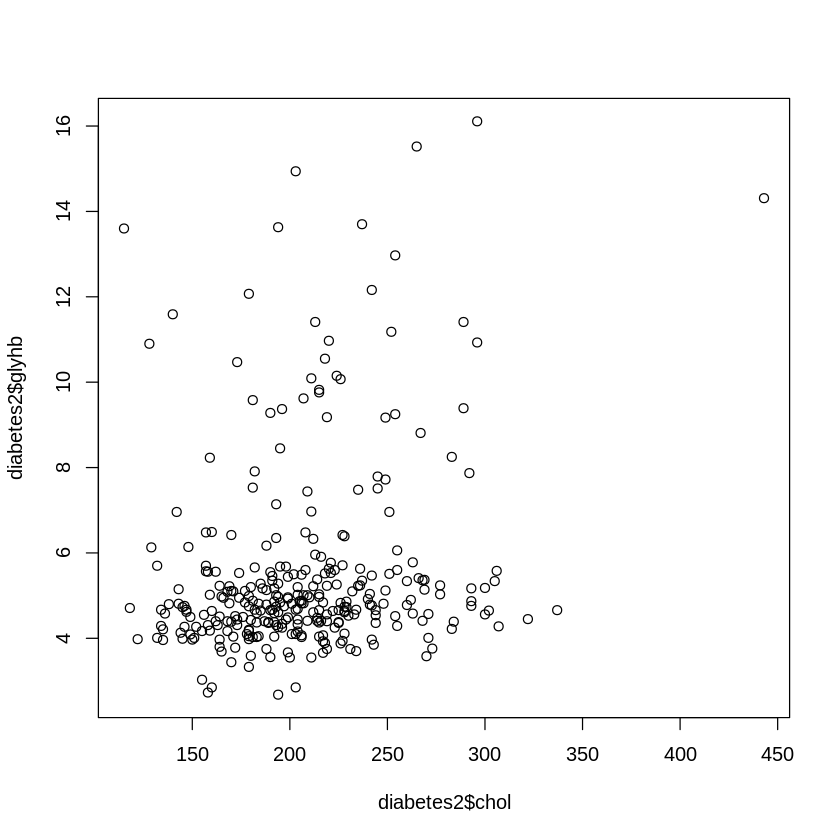

In [60]:
plot(diabetes2$chol,  diabetes2$glyhb)

# Left join 

In [72]:
?merge

In [67]:
setdiff(diabetes$subject, cholesterol$subject)

[1] "S1003"  "S1250"  "S1303"  "S2794"  "S2795"  "S3752"  "S4761"  "S4833" 
 [9] "S10000" "S12509" "S13501" "S15271" "S15512" "S15517" "S15518" "S15529"
[17] "S15800" "S17772" "S17773" "S17781" "S17813" "S20275" "S20313" "S20314"
[25] "S21254" "S21255" "S21322" "S21333" "S21345" "S40751" "S40754" "S40804"
[33] "S40805" "S41001"

In [69]:
sum(diabetes$subject == "S1003")

[1] 1

In [70]:
sum(cholesterol$subject == "S1003")

[1] 0

In [73]:
diabetes_left <- merge(diabetes, cholesterol, by="subject", all.x=TRUE) # este tipo de operaciòn 
                                                                        # se le llama left join

In [74]:
head(diabetes_left)

,subject,glyhb,location,age,gender,height,weight,frame,chol
,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,S10000,4.83,Buckingham,23,male,76,164,small,NA
2,S10001,4.01,Buckingham,21,female,65,169,large,132
3,S10016,6.39,Buckingham,71,female,63,244,large,228
4,S1002,4.64,Buckingham,58,female,61,256,large,228
5,S10020,7.53,Buckingham,64,male,71,225,large,181
6,S1003,4.63,Buckingham,67,male,67,119,large,NA


# Fundamentos básicos de programación

Referencia: 

https://www.datamentor.io/r-programming/if-else-statement/

In [75]:
x <- 10 

if ( x > 0){
  print("Número positivo")
}

[1] "Número positivo"


In [76]:
x <- 0

if ( x > 0){
  print("Número positivo")
}

In [78]:
x <- 10


if ( x >= 0 ){
   print("Número no-negativo")
} else{
  print("Número negativo")
}




[1] "Número no-negativo"


In [79]:
x <- -10


if ( x >= 0 ){
   print("Número no-negativo")
} else{
  print("Número negativo")
}



[1] "Número negativo"
